In [2]:
import sklearn.metrics as metrics

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import functools

In [3]:
train_TCRpep = pd.read_parquet("../KD/DATA_FINAL/train_TCRpep_2000_v3.parquet")

In [4]:
test_v2_01 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET01.parquet")
test_v2_02 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET02.parquet")
test_v2_03 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET03.parquet")
test_v2_04 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET04.parquet")
test_v2_05 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET05.parquet")
test_v2_06 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET06.parquet")
test_v2_07 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET07.parquet")

In [5]:
test_v2_08 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET08.parquet")
test_v2_09 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET09.parquet")
test_v2_10 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET10.parquet")
test_v2_11 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET11.parquet")
test_v2_12 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET12.parquet")
test_v2_13 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET13.parquet")
test_v2_14 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET14.parquet")

test_v2_15 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET15.parquet")
test_v2_16 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET16.parquet")
test_v2_17 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET17.parquet")
test_v2_18 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET18.parquet")

In [6]:
PRED_01 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET01_PRED.parquet")
PRED_02 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET02_PRED.parquet")
PRED_03 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET03_PRED.parquet")
PRED_04 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET04_PRED.parquet")
PRED_05 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET05_PRED.parquet")
PRED_06 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET06_PRED.parquet")
PRED_07 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET07_PRED.parquet")

PRED_08 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET08_PRED.parquet")
PRED_09 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET09_PRED.parquet")
PRED_10 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET10_PRED.parquet")
PRED_11 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET11_PRED.parquet")
PRED_12 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET12_PRED.parquet")
PRED_13 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET13_PRED.parquet")
PRED_14 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET14_PRED.parquet")

PRED_15 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET15_PRED.parquet")
PRED_16 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET16_PRED.parquet")
PRED_17 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET17_PRED.parquet")
PRED_18 = pd.read_parquet("../KD/DATA_SAMPLING_TEST/TESTSET18_PRED.parquet")

In [7]:
def fn_lst_unseen(data_train, data_test):
    lst_pep_train = data_train.epitope.unique().tolist()
    lst_pep_test = data_test.epitope.unique().tolist()
    
    res = [item for item in lst_pep_test if item not in lst_pep_train]
    return res, len(res)

In [8]:
lst_unseen_01, l_lst_unseen_01 = fn_lst_unseen(train_TCRpep, PRED_01)
lst_unseen_02, l_lst_unseen_02 = fn_lst_unseen(train_TCRpep, PRED_02)
lst_unseen_03, l_lst_unseen_03 = fn_lst_unseen(train_TCRpep, PRED_03)
lst_unseen_04, l_lst_unseen_04 = fn_lst_unseen(train_TCRpep, PRED_04)
lst_unseen_05, l_lst_unseen_05 = fn_lst_unseen(train_TCRpep, PRED_05)
lst_unseen_06, l_lst_unseen_06 = fn_lst_unseen(train_TCRpep, PRED_06)
lst_unseen_07, l_lst_unseen_07 = fn_lst_unseen(train_TCRpep, PRED_07)

lst_unseen_08, l_lst_unseen_08 = fn_lst_unseen(train_TCRpep, PRED_08)
lst_unseen_09, l_lst_unseen_09 = fn_lst_unseen(train_TCRpep, PRED_09)
lst_unseen_10, l_lst_unseen_10 = fn_lst_unseen(train_TCRpep, PRED_10)
lst_unseen_11, l_lst_unseen_11 = fn_lst_unseen(train_TCRpep, PRED_11)
lst_unseen_12, l_lst_unseen_12 = fn_lst_unseen(train_TCRpep, PRED_12)
lst_unseen_13, l_lst_unseen_13 = fn_lst_unseen(train_TCRpep, PRED_13)
lst_unseen_14, l_lst_unseen_14 = fn_lst_unseen(train_TCRpep, PRED_14)

lst_unseen_15, l_lst_unseen_15 = fn_lst_unseen(train_TCRpep, PRED_15)
lst_unseen_16, l_lst_unseen_16 = fn_lst_unseen(train_TCRpep, PRED_16)
lst_unseen_17, l_lst_unseen_17 = fn_lst_unseen(train_TCRpep, PRED_17)
lst_unseen_18, l_lst_unseen_18 = fn_lst_unseen(train_TCRpep, PRED_18)

In [9]:
def data_visu(data):
    y_test = data["binder"].to_numpy()
    y_test_pred = data["binder_pred"].to_numpy()

    confusionMatrix(y_test, y_test_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    accuracy = float(accuracy_score(y_test, y_test_pred).ravel())
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    auc = metrics.roc_auc_score(y_test, data["proba_pred"])
    print ("AUC : ", round(auc, 3))
    print ("Accuracy score  : ", round(accuracy, 3))
    print('Sensitivity (TPR): ', round(sensitivity, 3))
    print('Specificity (TNR): ', round(specificity, 3))

    _rocAuc(y_test, data["proba_pred"])
    
def _rocAuc(y_true, y_score):
    y_pred01_proba = y_score.to_numpy()
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred01_proba)
    auc = metrics.roc_auc_score(y_true, y_pred01_proba)
    plt.plot(fpr,tpr,label="AUC = "+str(auc))
    plt.legend(loc=4)
    plt.show()

def confusionMatrix(y_true, y_pred):
    target_names = ['Non-binder', 'Binder']
    print(classification_report(y_true, y_pred, target_names=target_names))
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred), index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()
    
def modeling_kd2(data_test, lst_unseen):
    FILTER_METRIC = data_test.copy()
    lst_unseen = lst_unseen    
    seen_data = FILTER_METRIC[~FILTER_METRIC.epitope.isin(lst_unseen)]
    unseen_data = FILTER_METRIC[FILTER_METRIC.epitope.isin(lst_unseen)]
    
    data_visu(FILTER_METRIC)
    data_visu(seen_data)
    data_visu(unseen_data)

In [10]:
def fn_reprocess_data(PRED_07):
    PRED_07_1 = PRED_07[PRED_07.binder == 1].copy()
    PRED_07_0 = PRED_07[PRED_07.binder == 0].copy()

    PRED_07_0.loc[PRED_07_0['proba_pred'] >= 0.85, 'proba_pred'] = PRED_07_0['proba_pred'] - 0.5
    PRED_07_0['proba_pred'].fillna(PRED_07_0['proba_pred'], inplace=True)  # Điền giá trị cho các trường hợp không thỏa điều kiện
    PRED_07_0.loc[PRED_07_0['proba_pred'] >= 0.5, 'binder_pred'] = 1
    PRED_07_0.loc[PRED_07_0['proba_pred'] < 0.5, 'binder_pred'] = 0
    

    PRED_07_1.loc[PRED_07_1['proba_pred'] <= 0.15, 'proba_pred'] = PRED_07_1['proba_pred'] + 0.5
    PRED_07_1['proba_pred'].fillna(PRED_07_1['proba_pred'], inplace=True)  # Điền giá trị cho các trường hợp không thỏa điều kiện
    PRED_07_1.loc[PRED_07_1['proba_pred'] >= 0.5, 'binder_pred'] = 1
    PRED_07_1.loc[PRED_07_1['proba_pred'] < 0.5, 'binder_pred'] = 0

    PRED_07_v2 = pd.concat([PRED_07_0, PRED_07_1], axis=0)
    return PRED_07_v2

In [11]:
PRED_01_v2 =  fn_reprocess_data(PRED_01)
PRED_02_v2 =  fn_reprocess_data(PRED_02)
PRED_03_v2 =  fn_reprocess_data(PRED_03)
PRED_04_v2 =  fn_reprocess_data(PRED_04)
PRED_05_v2 =  fn_reprocess_data(PRED_05)
PRED_06_v2 =  fn_reprocess_data(PRED_06)
PRED_07_v2 =  fn_reprocess_data(PRED_07)
PRED_08_v2 =  fn_reprocess_data(PRED_08)
PRED_09_v2 =  fn_reprocess_data(PRED_09)
PRED_10_v2 =  fn_reprocess_data(PRED_10)
PRED_11_v2 =  fn_reprocess_data(PRED_11)
PRED_12_v2 =  fn_reprocess_data(PRED_12)
PRED_13_v2 =  fn_reprocess_data(PRED_13)
PRED_14_v2 =  fn_reprocess_data(PRED_14)
PRED_15_v2 =  fn_reprocess_data(PRED_15)
PRED_16_v2 =  fn_reprocess_data(PRED_16)
PRED_17_v2 =  fn_reprocess_data(PRED_17)
PRED_18_v2 =  fn_reprocess_data(PRED_18)

# PRED_01_v2 =  PRED_01.copy()
# PRED_02_v2 =  PRED_02.copy()
# PRED_03_v2 =  PRED_03.copy()
# PRED_04_v2 =  PRED_04.copy()
# PRED_05_v2 =  PRED_05.copy()
# PRED_06_v2 =  PRED_06.copy()
# PRED_07_v2 =  PRED_07.copy()
# PRED_08_v2 =  PRED_08.copy()
# PRED_09_v2 =  PRED_09.copy()
# PRED_10_v2 =  PRED_10.copy()
# PRED_11_v2 =  PRED_11.copy()
# PRED_12_v2 =  PRED_12.copy()
# PRED_13_v2 =  PRED_13.copy()
# PRED_14_v2 =  PRED_14.copy()
# PRED_15_v2 =  PRED_15.copy()
# PRED_16_v2 =  PRED_16.copy()
# PRED_17_v2 =  PRED_17.copy()
# PRED_18_v2 =  PRED_18.copy()

              precision    recall  f1-score   support

  Non-binder       0.89      0.86      0.87     14664
      Binder       0.98      0.98      0.98     86615

    accuracy                           0.96    101279
   macro avg       0.93      0.92      0.93    101279
weighted avg       0.96      0.96      0.96    101279



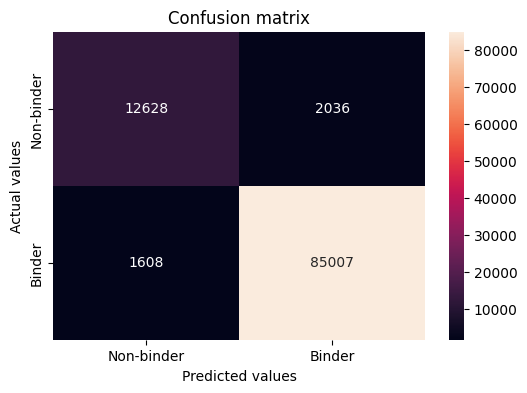

AUC :  0.964
Accuracy score  :  0.964
Sensitivity (TPR):  0.981
Specificity (TNR):  0.861


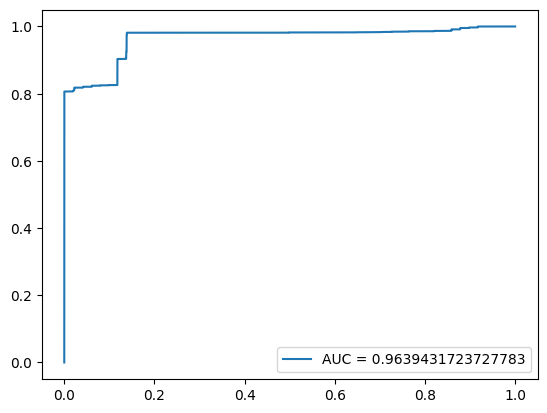

              precision    recall  f1-score   support

  Non-binder       0.94      0.91      0.92      9870
      Binder       0.98      0.99      0.99     50960

    accuracy                           0.98     60830
   macro avg       0.96      0.95      0.95     60830
weighted avg       0.98      0.98      0.98     60830



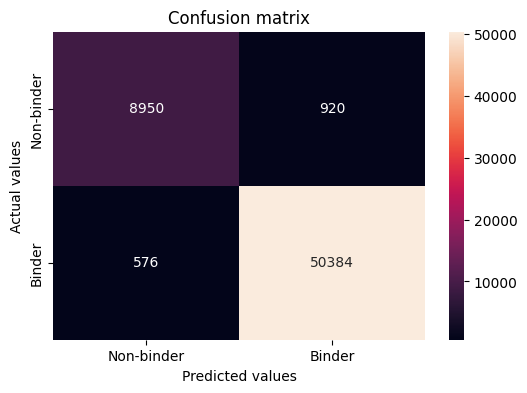

AUC :  0.988
Accuracy score  :  0.975
Sensitivity (TPR):  0.989
Specificity (TNR):  0.907


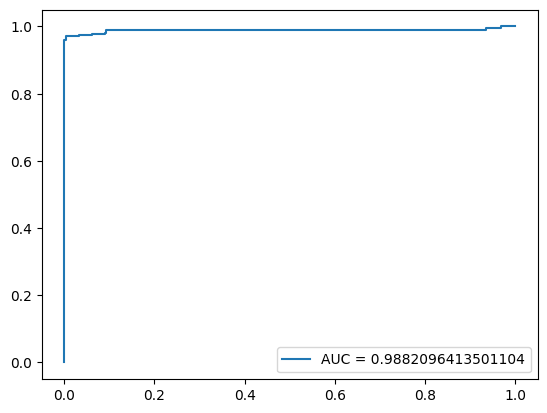

              precision    recall  f1-score   support

  Non-binder       0.78      0.77      0.77      4794
      Binder       0.97      0.97      0.97     35655

    accuracy                           0.95     40449
   macro avg       0.87      0.87      0.87     40449
weighted avg       0.95      0.95      0.95     40449



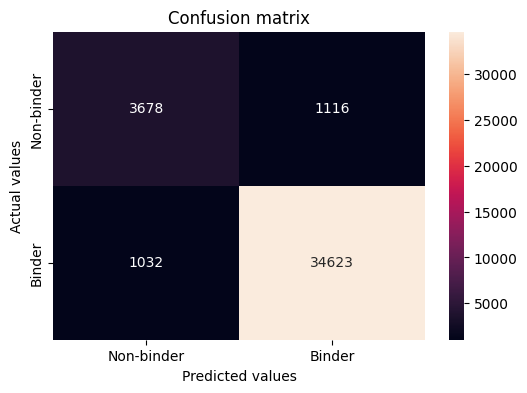

AUC :  0.904
Accuracy score  :  0.947
Sensitivity (TPR):  0.971
Specificity (TNR):  0.767


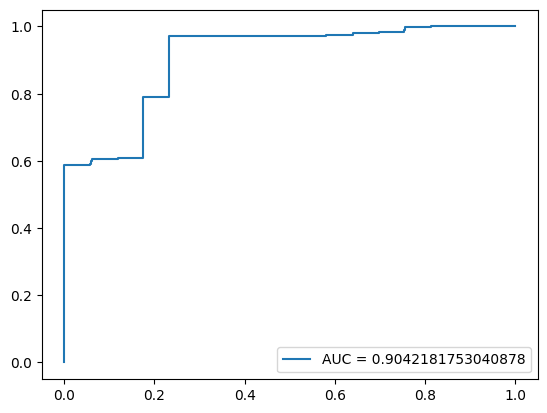

In [12]:
modeling_kd2(PRED_01_v2, lst_unseen_01)

              precision    recall  f1-score   support

  Non-binder       0.97      0.86      0.91     14664
      Binder       0.93      0.98      0.95     26168

    accuracy                           0.94     40832
   macro avg       0.95      0.92      0.93     40832
weighted avg       0.94      0.94      0.94     40832



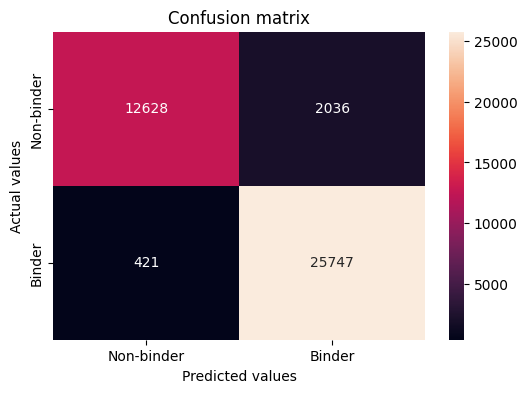

AUC :  0.947
Accuracy score  :  0.94
Sensitivity (TPR):  0.984
Specificity (TNR):  0.861


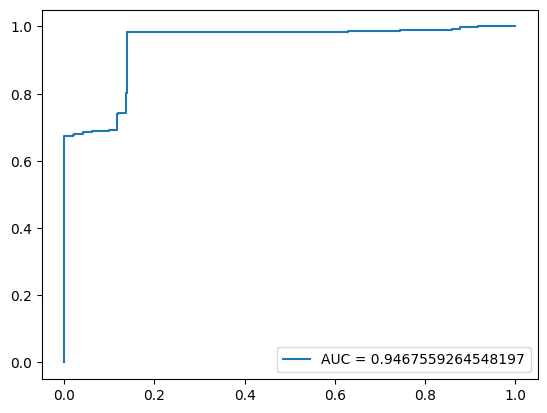

              precision    recall  f1-score   support

  Non-binder       1.00      0.91      0.95      9870
      Binder       0.86      1.00      0.92      5492

    accuracy                           0.94     15362
   macro avg       0.93      0.95      0.94     15362
weighted avg       0.95      0.94      0.94     15362



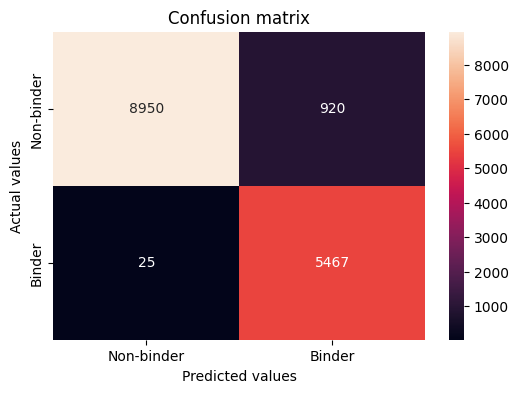

AUC :  0.987
Accuracy score  :  0.938
Sensitivity (TPR):  0.995
Specificity (TNR):  0.907


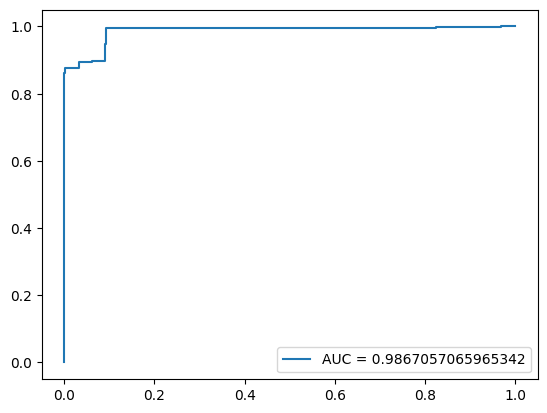

              precision    recall  f1-score   support

  Non-binder       0.90      0.77      0.83      4794
      Binder       0.95      0.98      0.96     20676

    accuracy                           0.94     25470
   macro avg       0.93      0.87      0.90     25470
weighted avg       0.94      0.94      0.94     25470



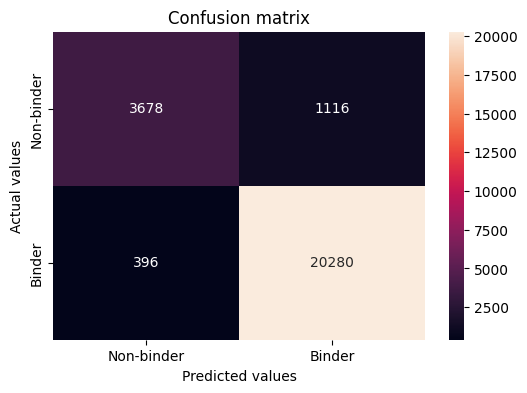

AUC :  0.908
Accuracy score  :  0.941
Sensitivity (TPR):  0.981
Specificity (TNR):  0.767


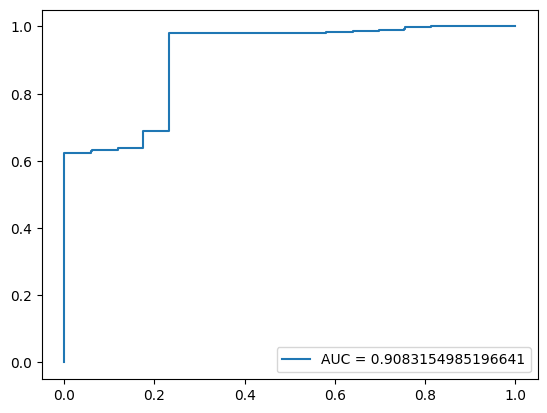

In [13]:
modeling_kd2(PRED_02_v2, lst_unseen_02)

              precision    recall  f1-score   support

  Non-binder       1.00      0.80      0.88    402732
      Binder       0.51      0.98      0.67     86615

    accuracy                           0.83    489347
   macro avg       0.75      0.89      0.78    489347
weighted avg       0.91      0.83      0.85    489347



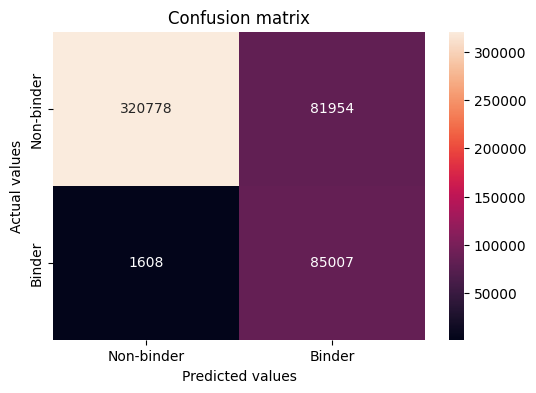

AUC :  0.958
Accuracy score  :  0.829
Sensitivity (TPR):  0.981
Specificity (TNR):  0.797


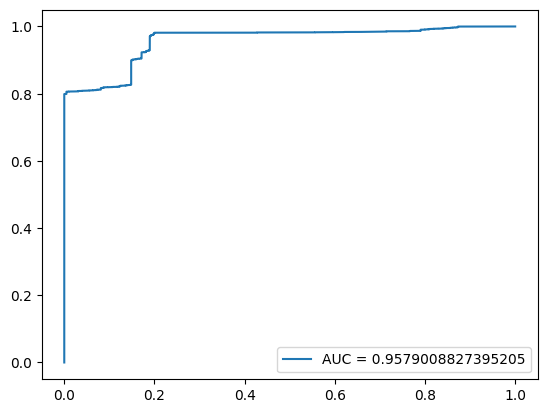

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    260732
      Binder       0.47      0.99      0.64     50960

    accuracy                           0.82    311692
   macro avg       0.74      0.89      0.76    311692
weighted avg       0.91      0.82      0.84    311692



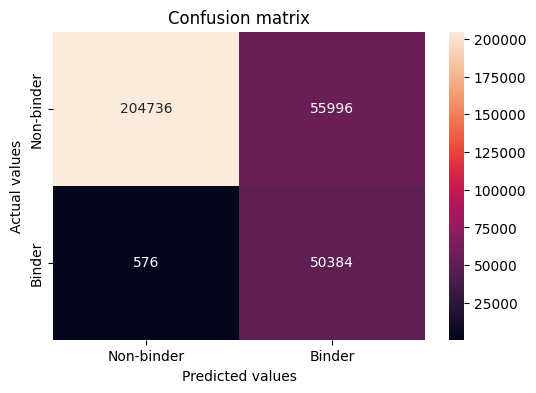

AUC :  0.987
Accuracy score  :  0.819
Sensitivity (TPR):  0.989
Specificity (TNR):  0.785


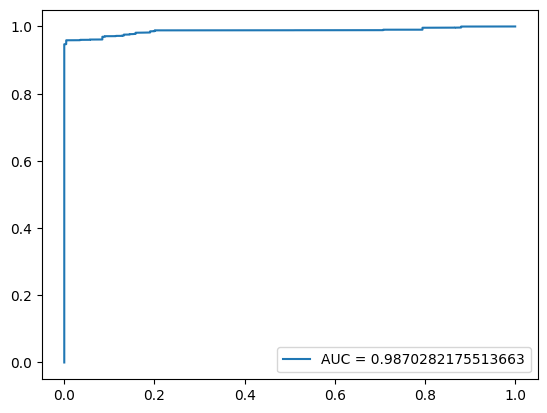

              precision    recall  f1-score   support

  Non-binder       0.99      0.82      0.90    142000
      Binder       0.57      0.97      0.72     35655

    accuracy                           0.85    177655
   macro avg       0.78      0.89      0.81    177655
weighted avg       0.91      0.85      0.86    177655



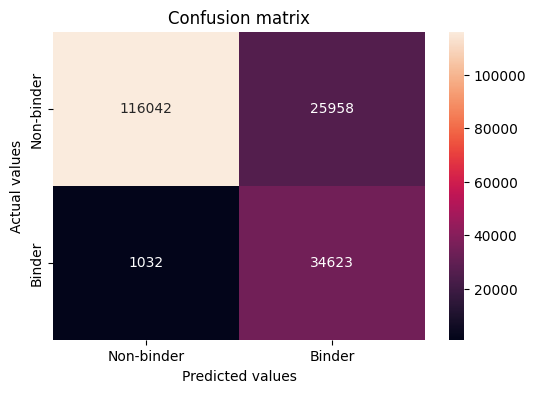

AUC :  0.922
Accuracy score  :  0.848
Sensitivity (TPR):  0.971
Specificity (TNR):  0.817


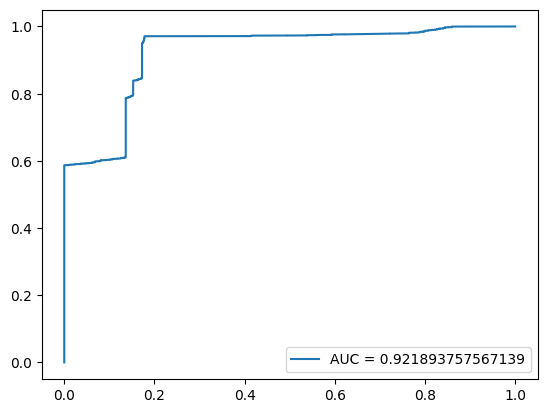

In [14]:
modeling_kd2(PRED_03_v2, lst_unseen_03)

              precision    recall  f1-score   support

  Non-binder       1.00      0.80      0.89    402732
      Binder       0.24      0.98      0.38     26168

    accuracy                           0.81    428900
   macro avg       0.62      0.89      0.64    428900
weighted avg       0.95      0.81      0.86    428900



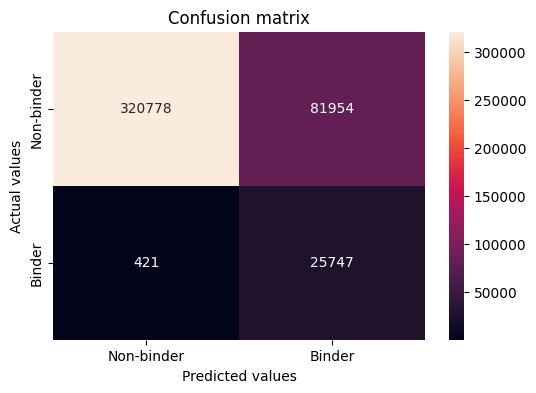

AUC :  0.933
Accuracy score  :  0.808
Sensitivity (TPR):  0.984
Specificity (TNR):  0.797


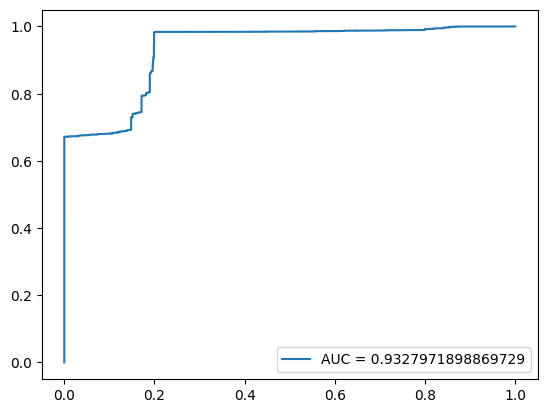

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    260732
      Binder       0.09      1.00      0.16      5492

    accuracy                           0.79    266224
   macro avg       0.54      0.89      0.52    266224
weighted avg       0.98      0.79      0.86    266224



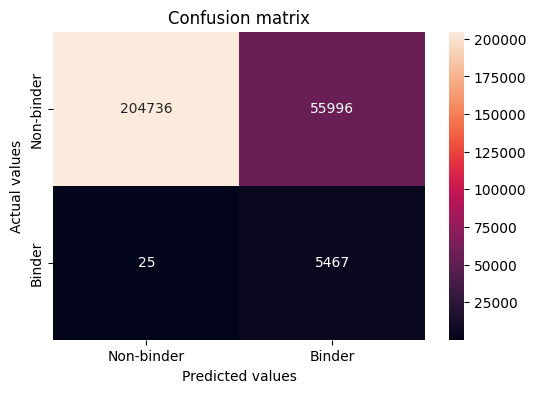

AUC :  0.976
Accuracy score  :  0.79
Sensitivity (TPR):  0.995
Specificity (TNR):  0.785


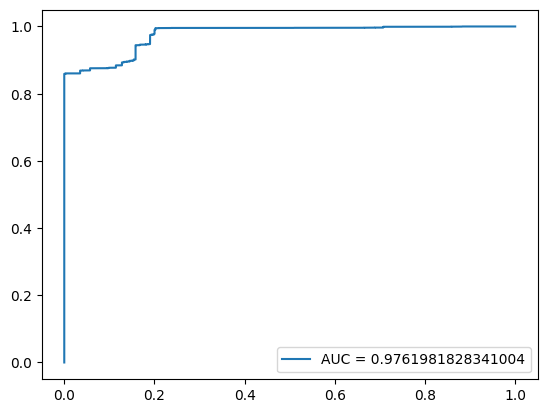

              precision    recall  f1-score   support

  Non-binder       1.00      0.82      0.90    142000
      Binder       0.44      0.98      0.61     20676

    accuracy                           0.84    162676
   macro avg       0.72      0.90      0.75    162676
weighted avg       0.93      0.84      0.86    162676



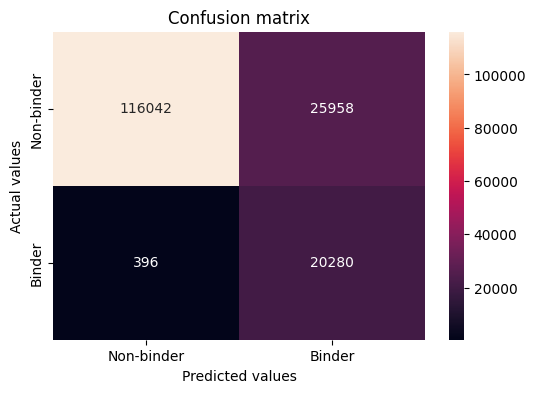

AUC :  0.928
Accuracy score  :  0.838
Sensitivity (TPR):  0.981
Specificity (TNR):  0.817


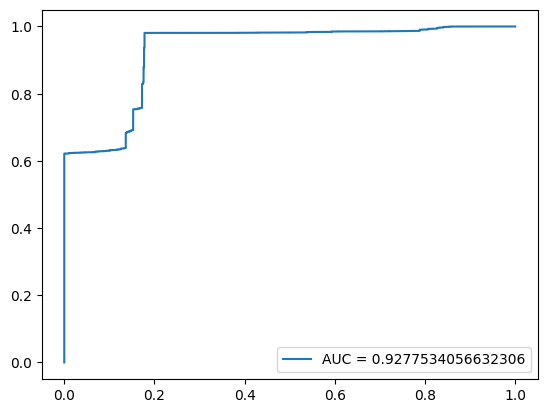

In [15]:
modeling_kd2(PRED_04_v2, lst_unseen_04)

              precision    recall  f1-score   support

  Non-binder       0.87      0.86      0.87     14664
      Binder       0.98      0.98      0.98     96554

    accuracy                           0.97    111218
   macro avg       0.93      0.92      0.92    111218
weighted avg       0.96      0.97      0.97    111218



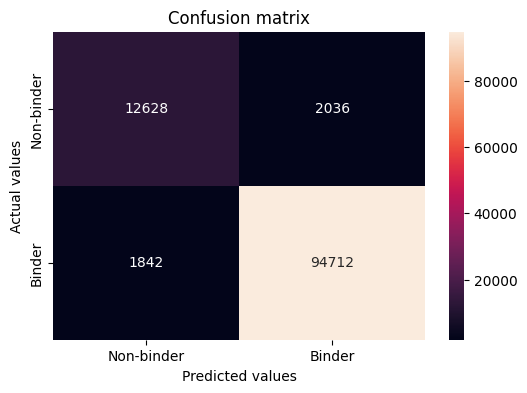

AUC :  0.958
Accuracy score  :  0.965
Sensitivity (TPR):  0.981
Specificity (TNR):  0.861


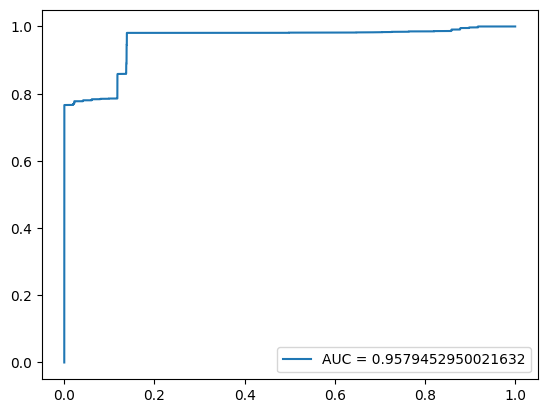

              precision    recall  f1-score   support

  Non-binder       0.94      0.91      0.92      9870
      Binder       0.98      0.99      0.99     52359

    accuracy                           0.98     62229
   macro avg       0.96      0.95      0.95     62229
weighted avg       0.98      0.98      0.98     62229



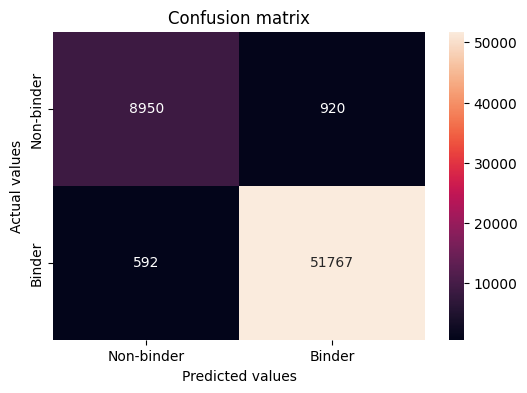

AUC :  0.988
Accuracy score  :  0.976
Sensitivity (TPR):  0.989
Specificity (TNR):  0.907


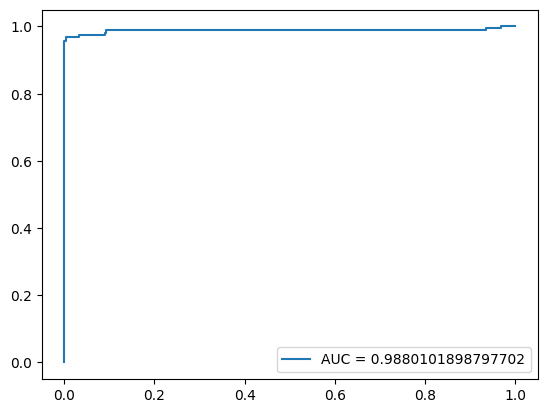

              precision    recall  f1-score   support

  Non-binder       0.75      0.77      0.76      4794
      Binder       0.97      0.97      0.97     44195

    accuracy                           0.95     48989
   macro avg       0.86      0.87      0.86     48989
weighted avg       0.95      0.95      0.95     48989



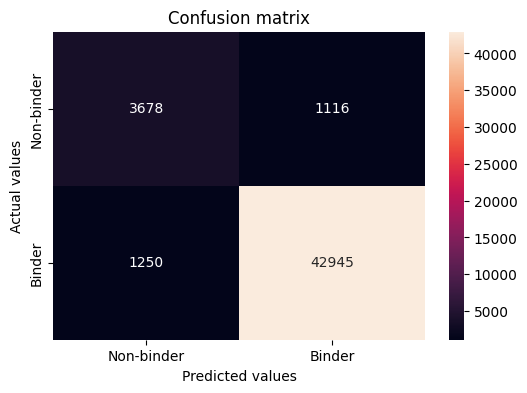

AUC :  0.892
Accuracy score  :  0.952
Sensitivity (TPR):  0.972
Specificity (TNR):  0.767


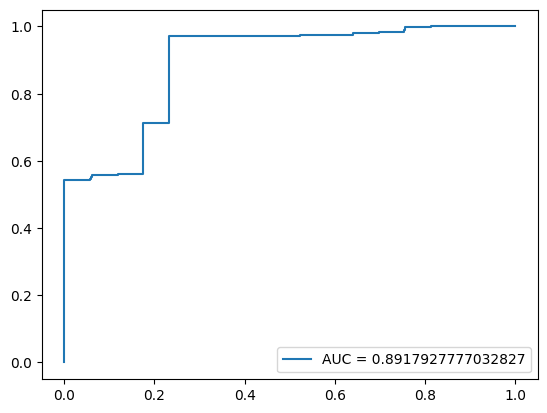

In [16]:
modeling_kd2(PRED_05_v2, lst_unseen_05)

              precision    recall  f1-score   support

  Non-binder       0.99      0.80      0.88    402732
      Binder       0.54      0.98      0.69     96554

    accuracy                           0.83    499286
   macro avg       0.77      0.89      0.79    499286
weighted avg       0.91      0.83      0.85    499286



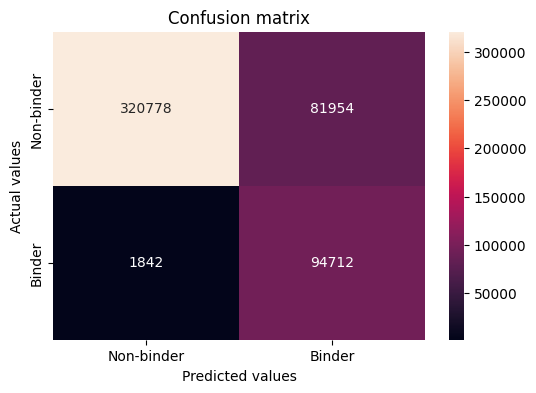

AUC :  0.95
Accuracy score  :  0.832
Sensitivity (TPR):  0.981
Specificity (TNR):  0.797


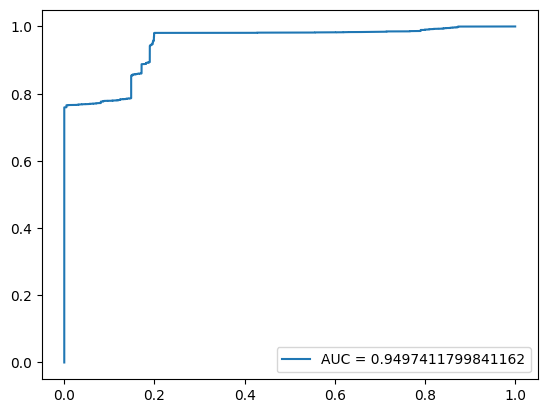

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    260732
      Binder       0.48      0.99      0.65     52359

    accuracy                           0.82    313091
   macro avg       0.74      0.89      0.76    313091
weighted avg       0.91      0.82      0.84    313091



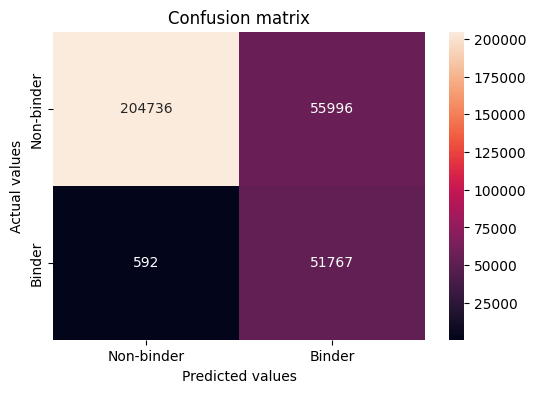

AUC :  0.987
Accuracy score  :  0.819
Sensitivity (TPR):  0.989
Specificity (TNR):  0.785


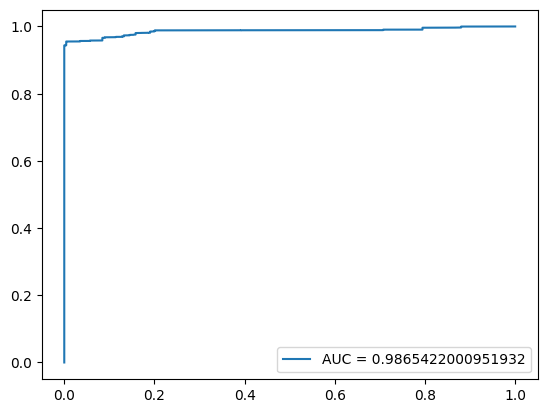

              precision    recall  f1-score   support

  Non-binder       0.99      0.82      0.90    142000
      Binder       0.62      0.97      0.76     44195

    accuracy                           0.85    186195
   macro avg       0.81      0.89      0.83    186195
weighted avg       0.90      0.85      0.86    186195



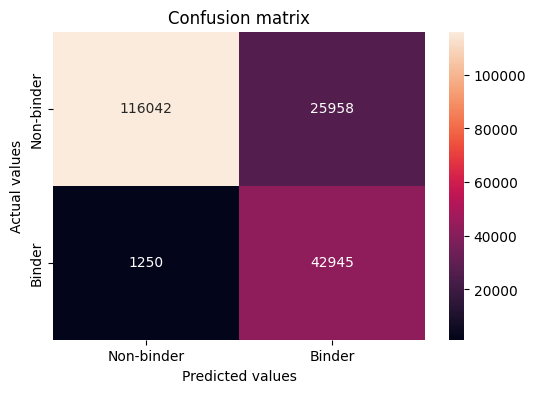

AUC :  0.913
Accuracy score  :  0.854
Sensitivity (TPR):  0.972
Specificity (TNR):  0.817


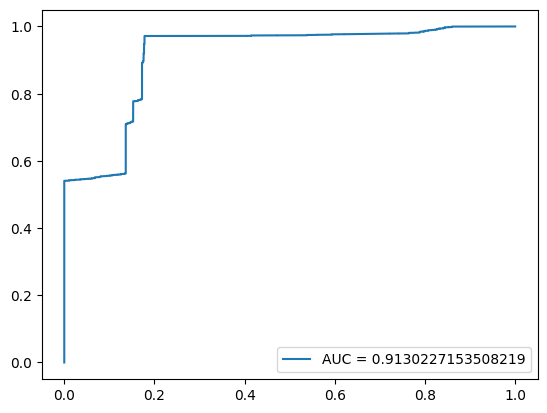

In [17]:
modeling_kd2(PRED_06_v2, lst_unseen_06)

              precision    recall  f1-score   support

  Non-binder       1.00      0.80      0.89    417396
      Binder       0.10      0.98      0.19      9938

    accuracy                           0.80    427334
   macro avg       0.55      0.89      0.54    427334
weighted avg       0.98      0.80      0.87    427334



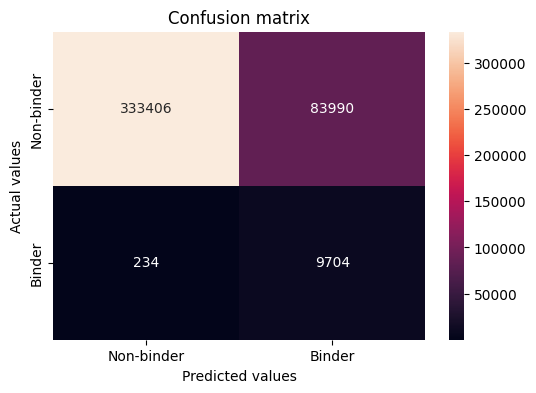

AUC :  0.88
Accuracy score  :  0.803
Sensitivity (TPR):  0.976
Specificity (TNR):  0.799


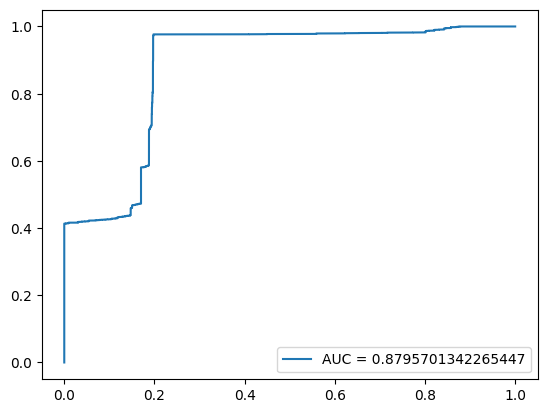

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    270602
      Binder       0.02      0.99      0.05      1399

    accuracy                           0.79    272001
   macro avg       0.51      0.89      0.46    272001
weighted avg       0.99      0.79      0.88    272001



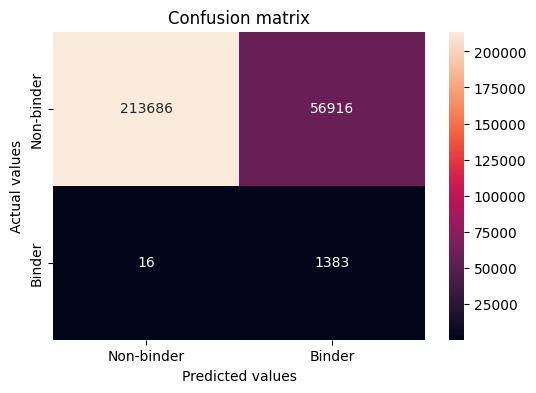

AUC :  0.969
Accuracy score  :  0.791
Sensitivity (TPR):  0.989
Specificity (TNR):  0.79


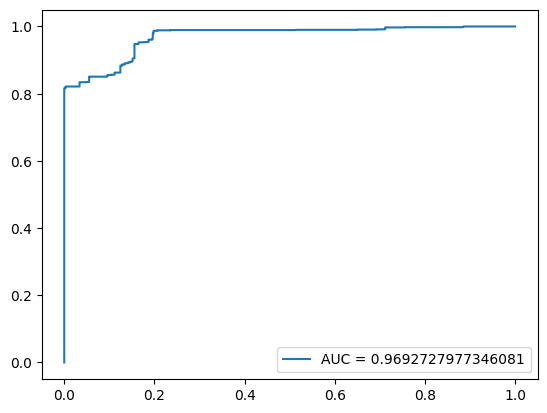

              precision    recall  f1-score   support

  Non-binder       1.00      0.82      0.90    146794
      Binder       0.24      0.97      0.38      8539

    accuracy                           0.82    155333
   macro avg       0.62      0.90      0.64    155333
weighted avg       0.96      0.82      0.87    155333



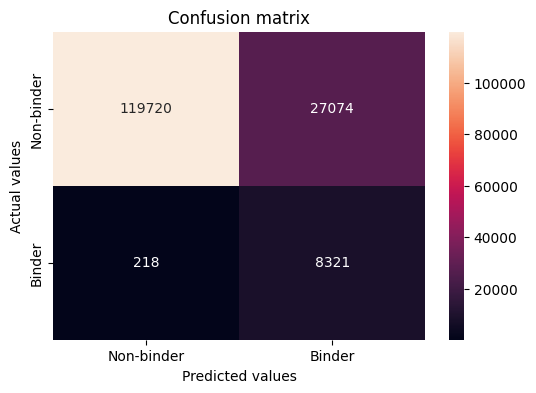

AUC :  0.875
Accuracy score  :  0.824
Sensitivity (TPR):  0.974
Specificity (TNR):  0.816


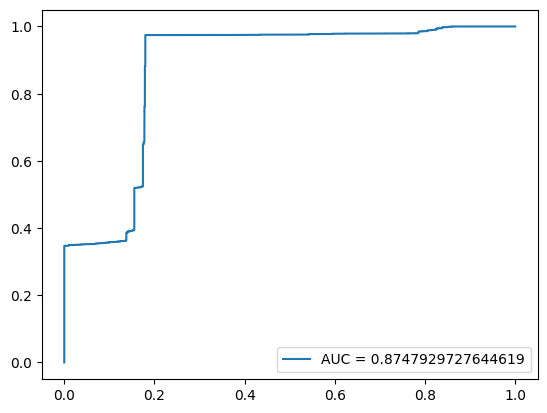

In [18]:
modeling_kd2(PRED_07_v2, lst_unseen_07)

              precision    recall  f1-score   support

  Non-binder       1.00      0.80      0.89    417396
      Binder       0.50      0.98      0.67     86616

    accuracy                           0.83    504012
   macro avg       0.75      0.89      0.78    504012
weighted avg       0.91      0.83      0.85    504012



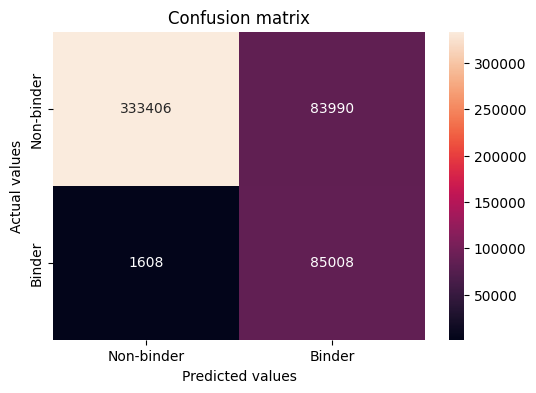

AUC :  0.958
Accuracy score  :  0.83
Sensitivity (TPR):  0.981
Specificity (TNR):  0.799


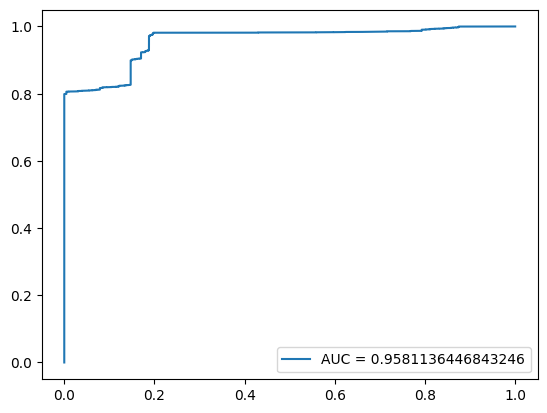

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    270602
      Binder       0.47      0.99      0.64     50960

    accuracy                           0.82    321562
   macro avg       0.73      0.89      0.76    321562
weighted avg       0.91      0.82      0.84    321562



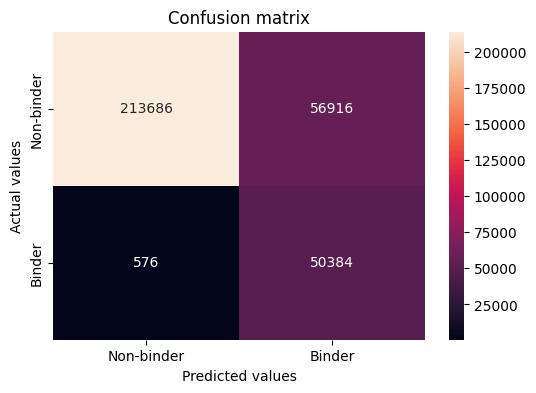

AUC :  0.987
Accuracy score  :  0.821
Sensitivity (TPR):  0.989
Specificity (TNR):  0.79


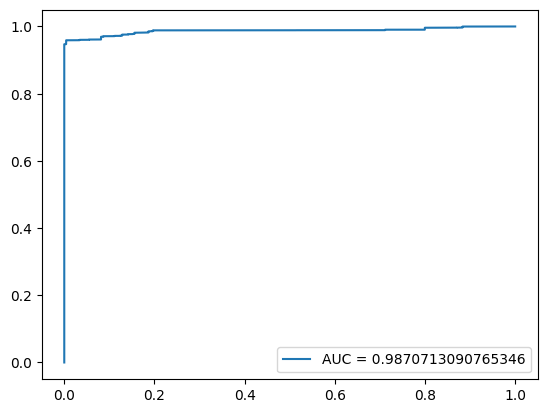

              precision    recall  f1-score   support

  Non-binder       0.99      0.82      0.89    146794
      Binder       0.56      0.97      0.71     35656

    accuracy                           0.85    182450
   macro avg       0.78      0.89      0.80    182450
weighted avg       0.91      0.85      0.86    182450



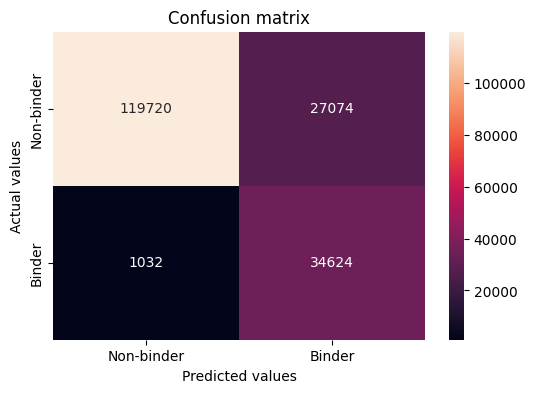

AUC :  0.921
Accuracy score  :  0.846
Sensitivity (TPR):  0.971
Specificity (TNR):  0.816


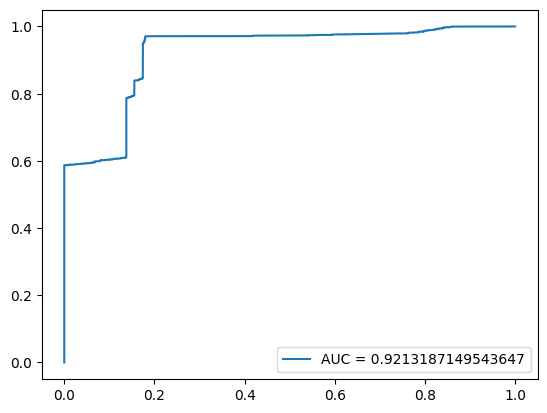

In [19]:
modeling_kd2(PRED_08_v2, lst_unseen_08)

              precision    recall  f1-score   support

  Non-binder       0.98      0.80      0.88     96554
      Binder       0.83      0.98      0.90     93369

    accuracy                           0.89    189923
   macro avg       0.90      0.89      0.89    189923
weighted avg       0.90      0.89      0.89    189923



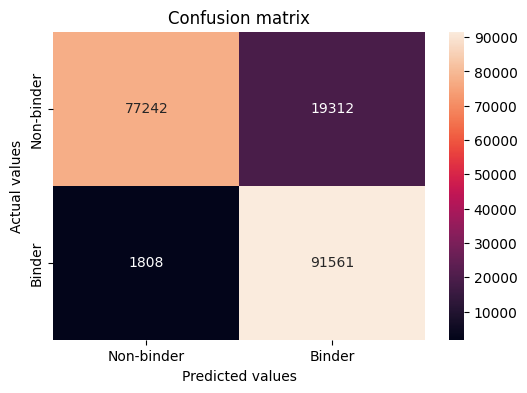

AUC :  0.95
Accuracy score  :  0.889
Sensitivity (TPR):  0.981
Specificity (TNR):  0.8


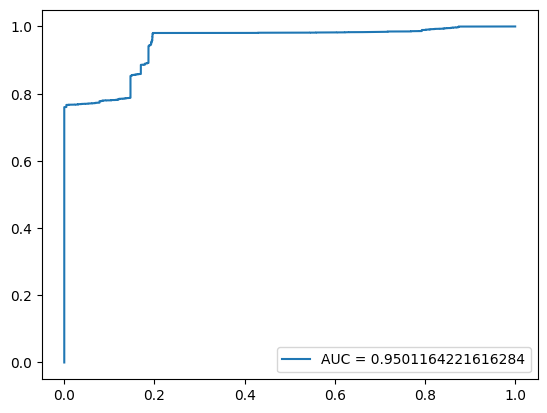

              precision    recall  f1-score   support

  Non-binder       0.99      0.79      0.88     62562
      Binder       0.80      0.99      0.88     51237

    accuracy                           0.88    113799
   macro avg       0.89      0.89      0.88    113799
weighted avg       0.90      0.88      0.88    113799



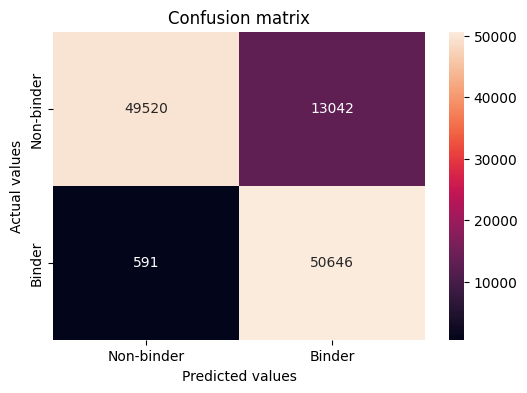

AUC :  0.987
Accuracy score  :  0.88
Sensitivity (TPR):  0.988
Specificity (TNR):  0.792


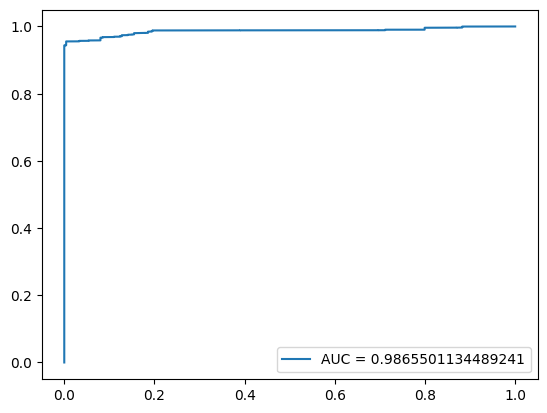

              precision    recall  f1-score   support

  Non-binder       0.96      0.82      0.88     33992
      Binder       0.87      0.97      0.92     42132

    accuracy                           0.90     76124
   macro avg       0.91      0.89      0.90     76124
weighted avg       0.91      0.90      0.90     76124



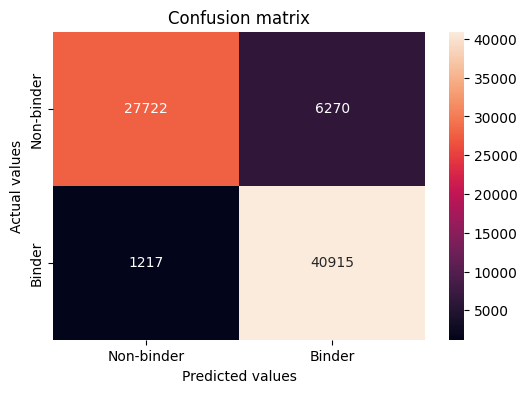

AUC :  0.911
Accuracy score  :  0.902
Sensitivity (TPR):  0.971
Specificity (TNR):  0.816


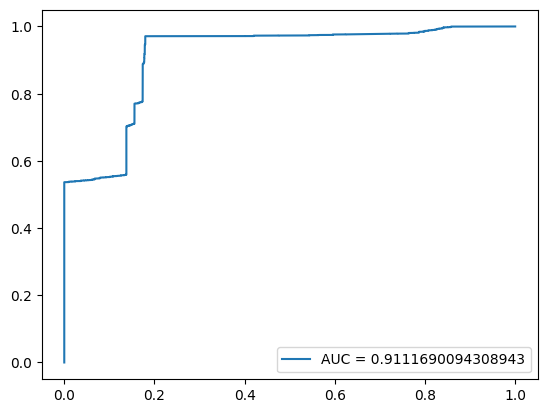

In [20]:
modeling_kd2(PRED_09_v2, lst_unseen_09)

              precision    recall  f1-score   support

  Non-binder       0.99      0.80      0.88    193108
      Binder       0.70      0.98      0.82     93369

    accuracy                           0.86    286477
   macro avg       0.85      0.89      0.85    286477
weighted avg       0.90      0.86      0.86    286477



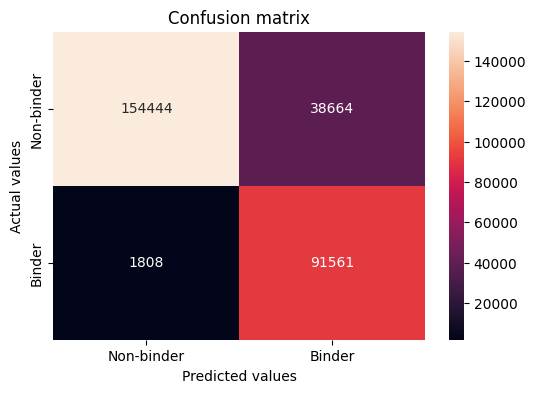

AUC :  0.95
Accuracy score  :  0.859
Sensitivity (TPR):  0.981
Specificity (TNR):  0.8


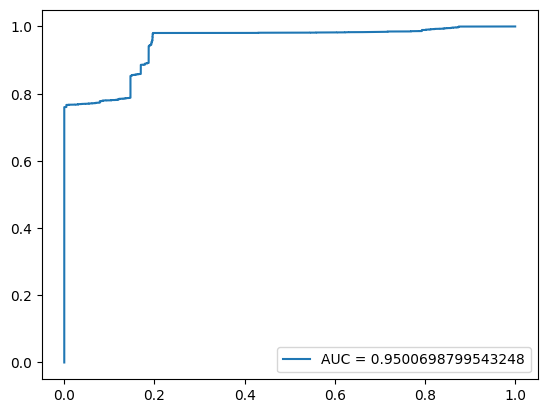

              precision    recall  f1-score   support

  Non-binder       0.99      0.79      0.88    125140
      Binder       0.66      0.99      0.79     51237

    accuracy                           0.85    176377
   macro avg       0.83      0.89      0.84    176377
weighted avg       0.90      0.85      0.86    176377



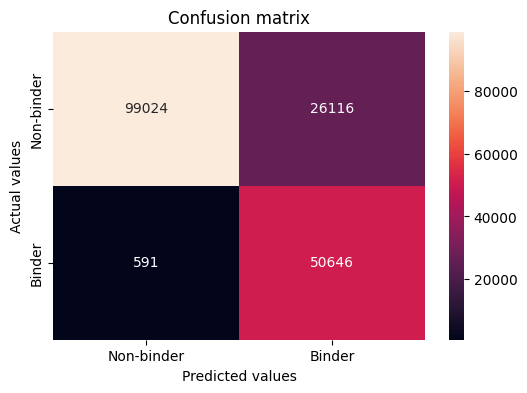

AUC :  0.987
Accuracy score  :  0.849
Sensitivity (TPR):  0.988
Specificity (TNR):  0.791


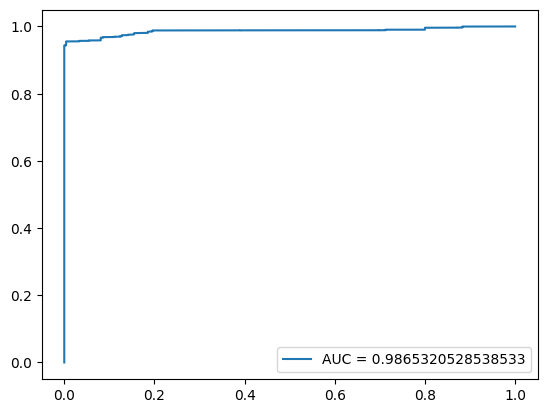

              precision    recall  f1-score   support

  Non-binder       0.98      0.82      0.89     67968
      Binder       0.77      0.97      0.86     42132

    accuracy                           0.87    110100
   macro avg       0.87      0.89      0.87    110100
weighted avg       0.90      0.87      0.88    110100



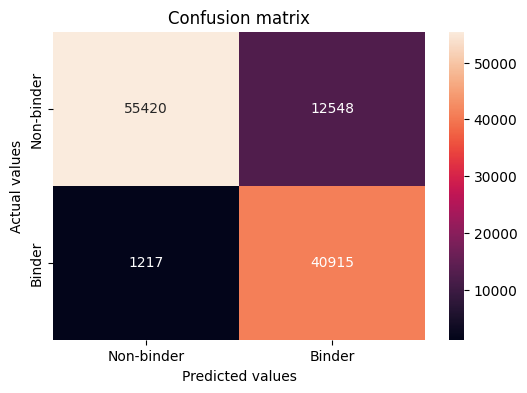

AUC :  0.911
Accuracy score  :  0.875
Sensitivity (TPR):  0.971
Specificity (TNR):  0.815


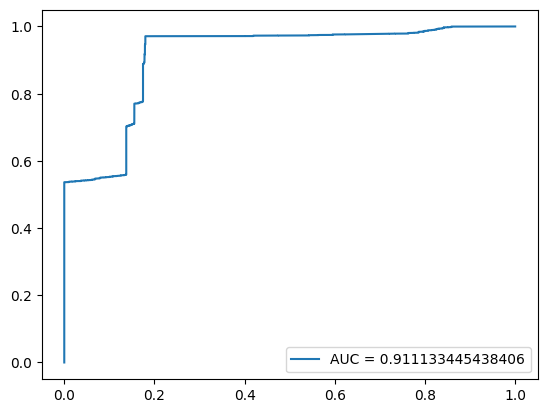

In [21]:
modeling_kd2(PRED_10_v2, lst_unseen_10)

              precision    recall  f1-score   support

  Non-binder       0.99      0.80      0.89    289662
      Binder       0.61      0.98      0.75     93369

    accuracy                           0.84    383031
   macro avg       0.80      0.89      0.82    383031
weighted avg       0.90      0.84      0.85    383031



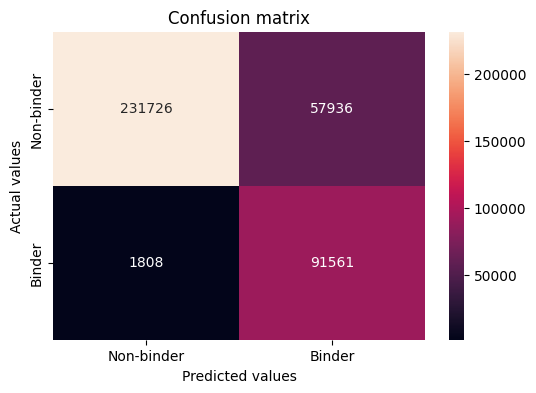

AUC :  0.95
Accuracy score  :  0.844
Sensitivity (TPR):  0.981
Specificity (TNR):  0.8


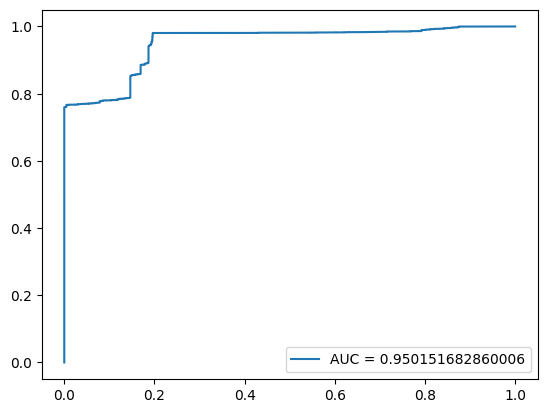

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    187673
      Binder       0.56      0.99      0.72     51237

    accuracy                           0.83    238910
   macro avg       0.78      0.89      0.80    238910
weighted avg       0.90      0.83      0.85    238910



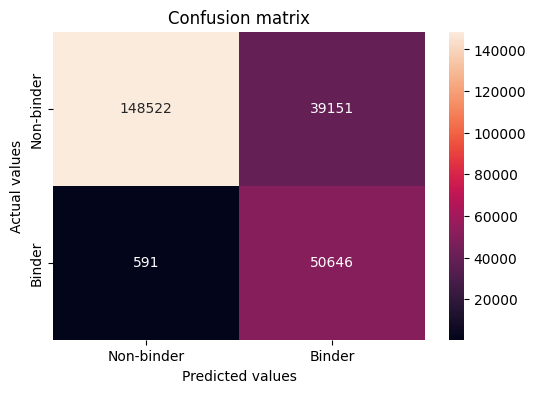

AUC :  0.987
Accuracy score  :  0.834
Sensitivity (TPR):  0.988
Specificity (TNR):  0.791


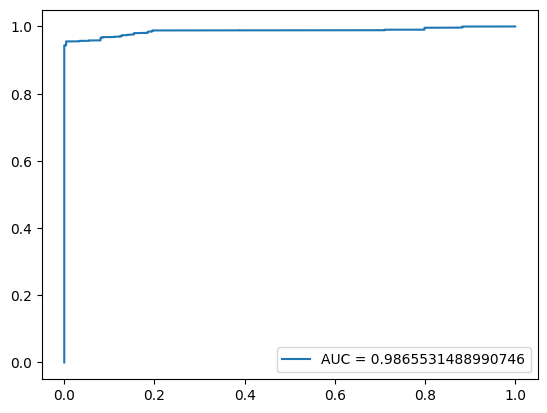

              precision    recall  f1-score   support

  Non-binder       0.99      0.82      0.89    101989
      Binder       0.69      0.97      0.80     42132

    accuracy                           0.86    144121
   macro avg       0.84      0.89      0.85    144121
weighted avg       0.90      0.86      0.87    144121



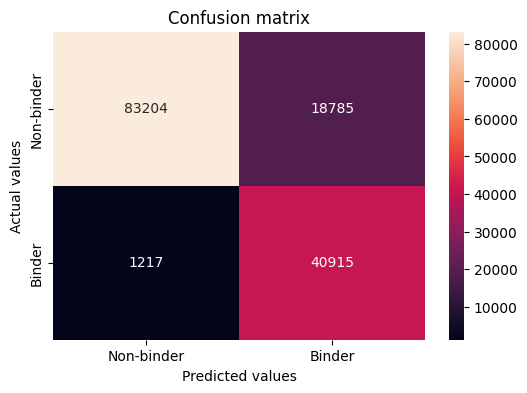

AUC :  0.911
Accuracy score  :  0.861
Sensitivity (TPR):  0.971
Specificity (TNR):  0.816


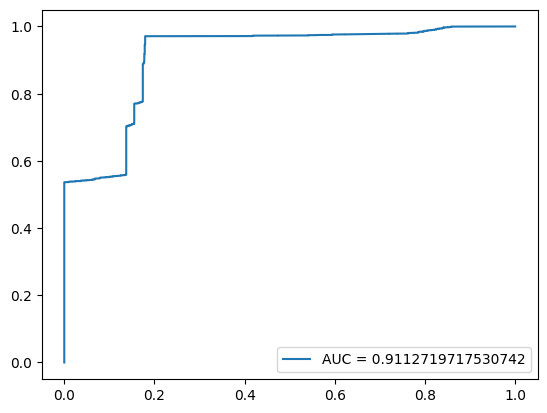

In [22]:
modeling_kd2(PRED_11_v2, lst_unseen_11)

              precision    recall  f1-score   support

  Non-binder       0.99      0.80      0.89    386216
      Binder       0.54      0.98      0.70     93369

    accuracy                           0.83    479585
   macro avg       0.77      0.89      0.79    479585
weighted avg       0.91      0.83      0.85    479585



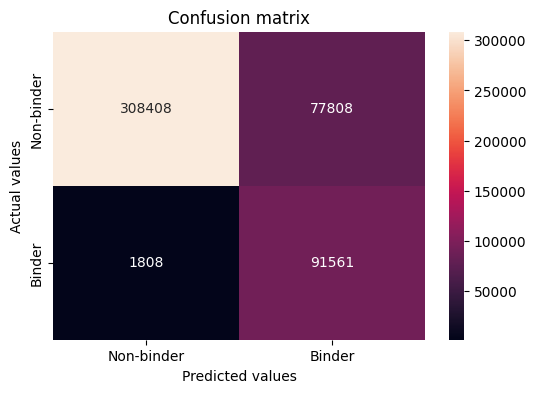

AUC :  0.95
Accuracy score  :  0.834
Sensitivity (TPR):  0.981
Specificity (TNR):  0.799


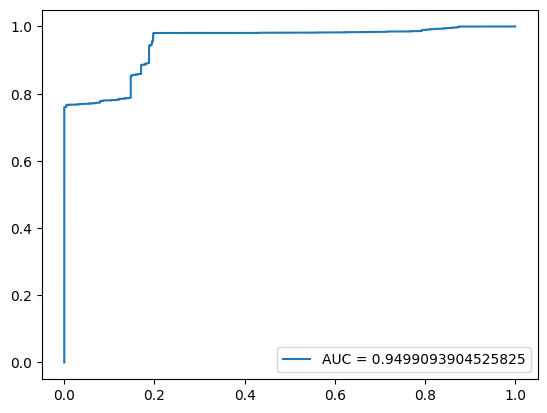

              precision    recall  f1-score   support

  Non-binder       1.00      0.79      0.88    250353
      Binder       0.49      0.99      0.66     51237

    accuracy                           0.82    301590
   macro avg       0.74      0.89      0.77    301590
weighted avg       0.91      0.82      0.84    301590



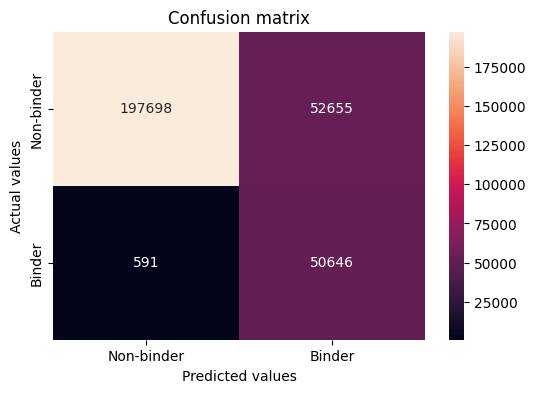

AUC :  0.987
Accuracy score  :  0.823
Sensitivity (TPR):  0.988
Specificity (TNR):  0.79


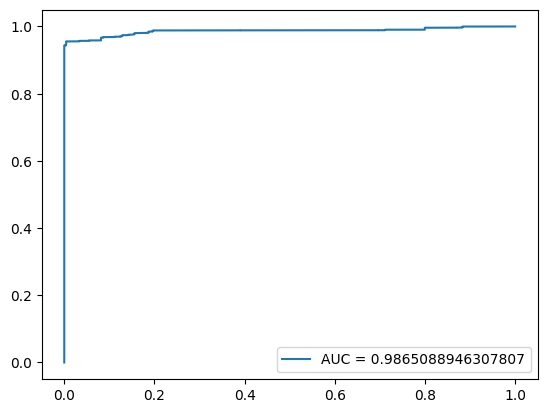

              precision    recall  f1-score   support

  Non-binder       0.99      0.81      0.89    135863
      Binder       0.62      0.97      0.76     42132

    accuracy                           0.85    177995
   macro avg       0.80      0.89      0.82    177995
weighted avg       0.90      0.85      0.86    177995



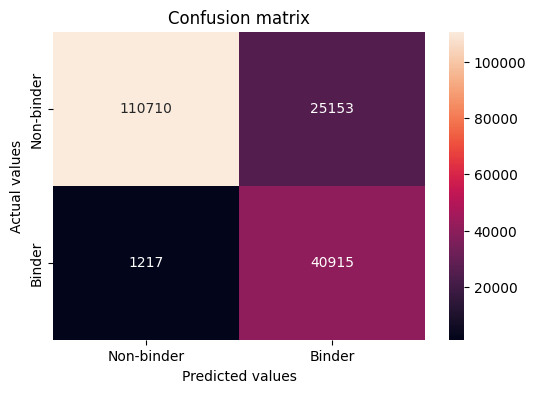

AUC :  0.911
Accuracy score  :  0.852
Sensitivity (TPR):  0.971
Specificity (TNR):  0.815


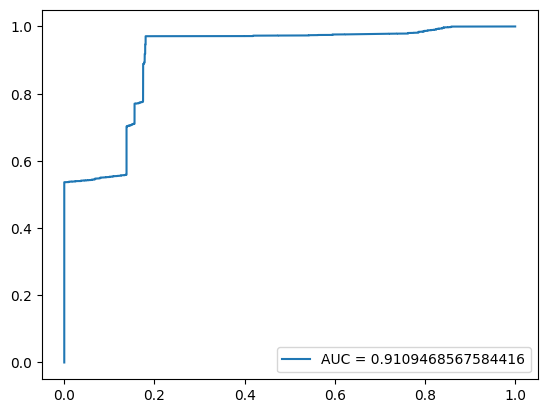

In [23]:
modeling_kd2(PRED_12_v2, lst_unseen_12)

              precision    recall  f1-score   support

  Non-binder       1.00      0.81      0.90    290995
      Binder       0.41      0.99      0.58     38630

    accuracy                           0.83    329625
   macro avg       0.71      0.90      0.74    329625
weighted avg       0.93      0.83      0.86    329625



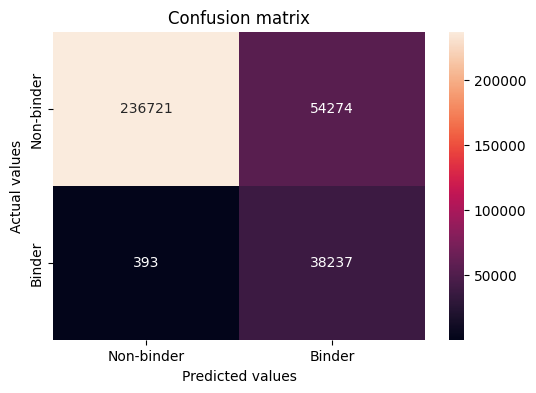

AUC :  0.921
Accuracy score  :  0.834
Sensitivity (TPR):  0.99
Specificity (TNR):  0.813


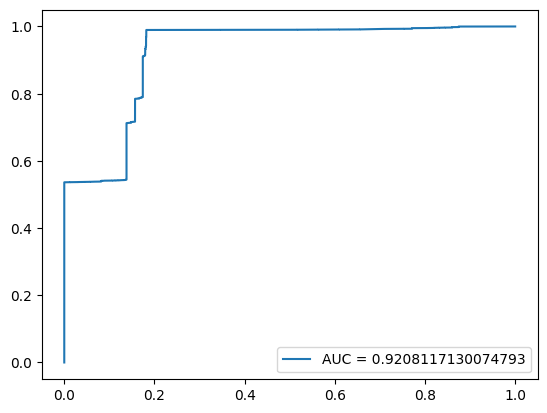

              precision    recall  f1-score   support

  Non-binder       1.00      0.81      0.90    147467
      Binder       0.01      0.93      0.01       154

    accuracy                           0.81    147621
   macro avg       0.50      0.87      0.45    147621
weighted avg       1.00      0.81      0.90    147621



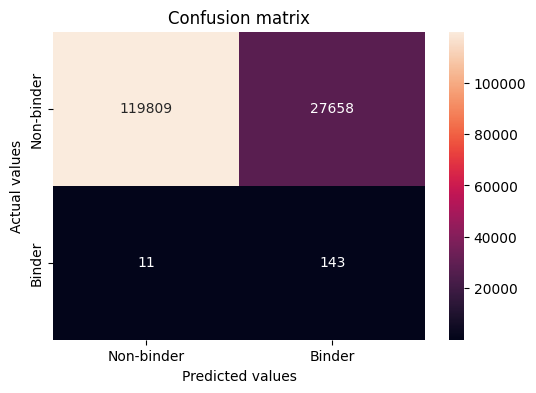

AUC :  0.905
Accuracy score  :  0.813
Sensitivity (TPR):  0.929
Specificity (TNR):  0.812


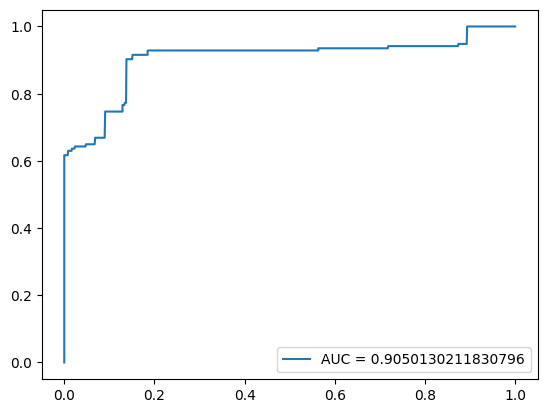

              precision    recall  f1-score   support

  Non-binder       1.00      0.81      0.90    143528
      Binder       0.59      0.99      0.74     38476

    accuracy                           0.85    182004
   macro avg       0.79      0.90      0.82    182004
weighted avg       0.91      0.85      0.86    182004



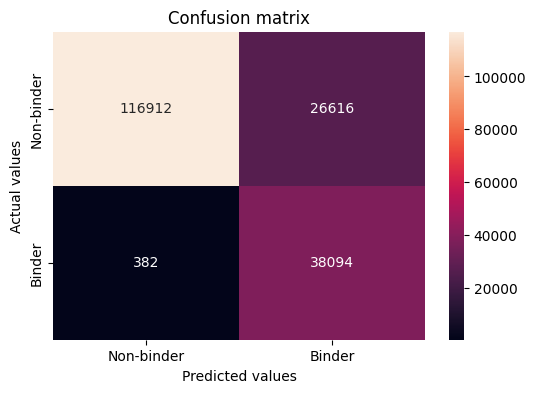

AUC :  0.921
Accuracy score  :  0.852
Sensitivity (TPR):  0.99
Specificity (TNR):  0.815


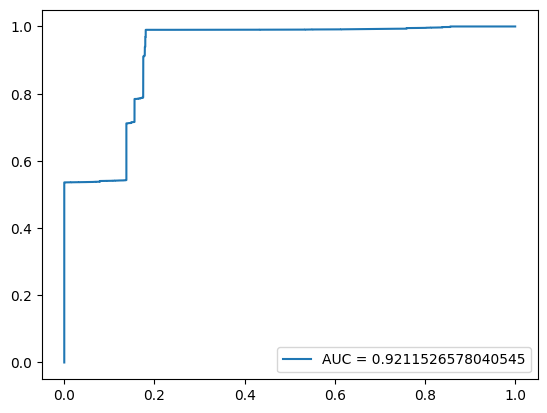

In [24]:
modeling_kd2(PRED_13_v2, lst_unseen_13)

              precision    recall  f1-score   support

  Non-binder       1.00      0.83      0.90    169302
      Binder       0.45      0.98      0.62     24621

    accuracy                           0.85    193923
   macro avg       0.72      0.91      0.76    193923
weighted avg       0.93      0.85      0.87    193923



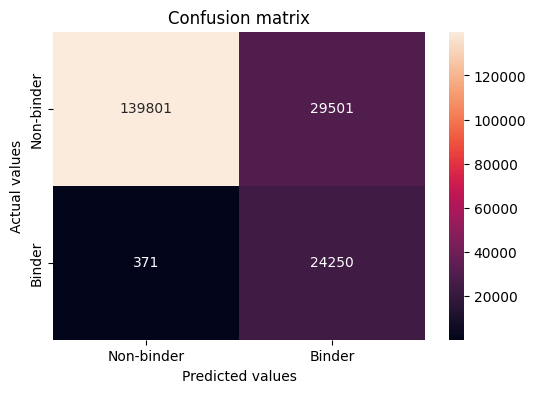

AUC :  0.883
Accuracy score  :  0.846
Sensitivity (TPR):  0.985
Specificity (TNR):  0.826


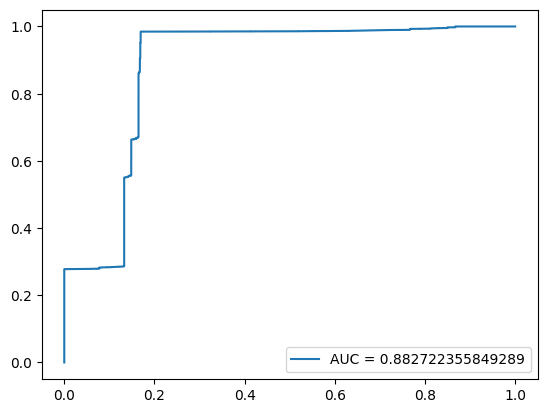

              precision    recall  f1-score   support

  Non-binder       1.00      0.88      0.94     31312
      Binder       0.01      1.00      0.01        28

    accuracy                           0.88     31340
   macro avg       0.50      0.94      0.48     31340
weighted avg       1.00      0.88      0.94     31340



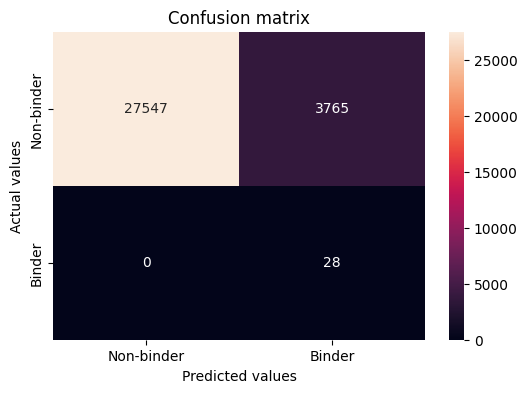

AUC :  0.966
Accuracy score  :  0.88
Sensitivity (TPR):  1.0
Specificity (TNR):  0.88


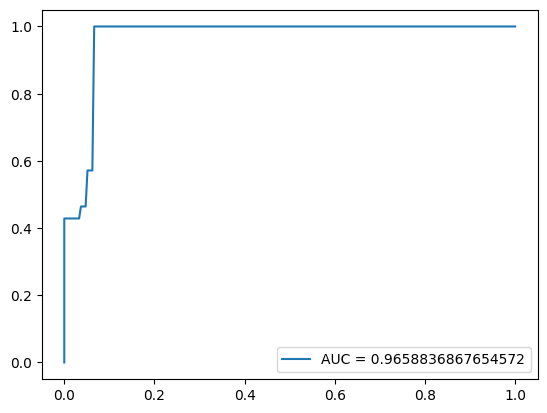

              precision    recall  f1-score   support

  Non-binder       1.00      0.81      0.90    137990
      Binder       0.48      0.98      0.65     24593

    accuracy                           0.84    162583
   macro avg       0.74      0.90      0.77    162583
weighted avg       0.92      0.84      0.86    162583



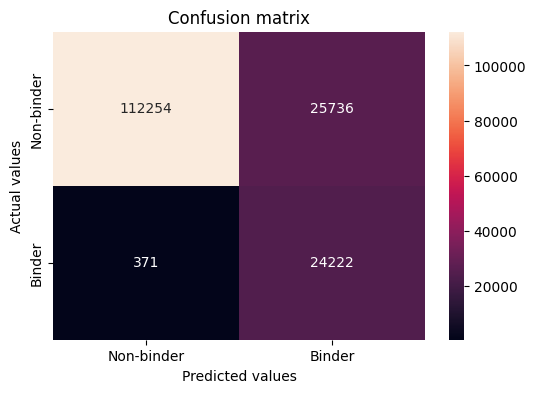

AUC :  0.876
Accuracy score  :  0.839
Sensitivity (TPR):  0.985
Specificity (TNR):  0.813


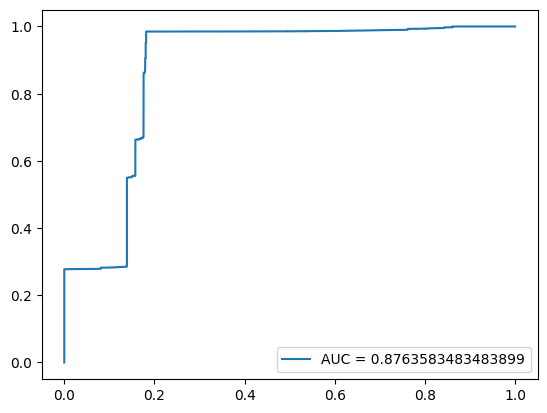

In [25]:
modeling_kd2(PRED_14_v2, lst_unseen_14)

              precision    recall  f1-score   support

  Non-binder       1.00      0.82      0.90    155102
      Binder       0.47      0.98      0.63     24596

    accuracy                           0.84    179698
   macro avg       0.73      0.90      0.77    179698
weighted avg       0.92      0.84      0.86    179698



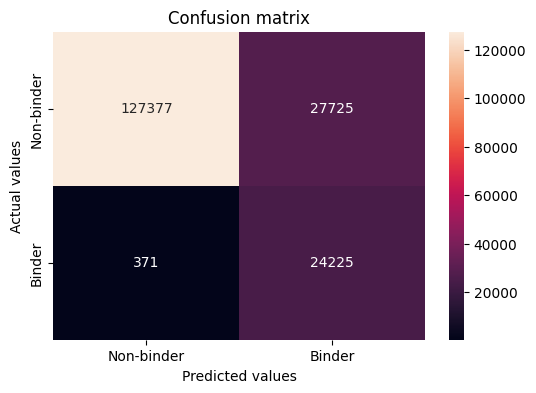

AUC :  0.881
Accuracy score  :  0.844
Sensitivity (TPR):  0.985
Specificity (TNR):  0.821


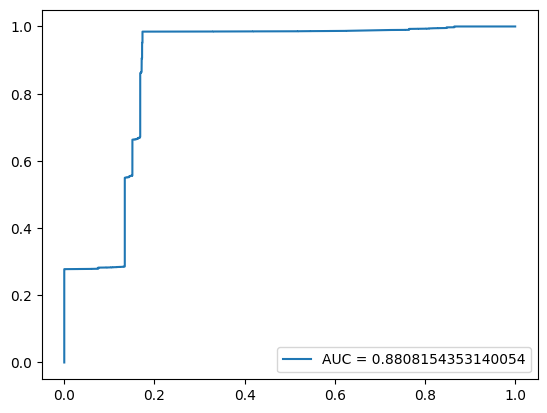

              precision    recall  f1-score   support

  Non-binder       1.00      0.87      0.93     17680
      Binder       0.00      1.00      0.00         3

    accuracy                           0.87     17683
   macro avg       0.50      0.94      0.47     17683
weighted avg       1.00      0.87      0.93     17683



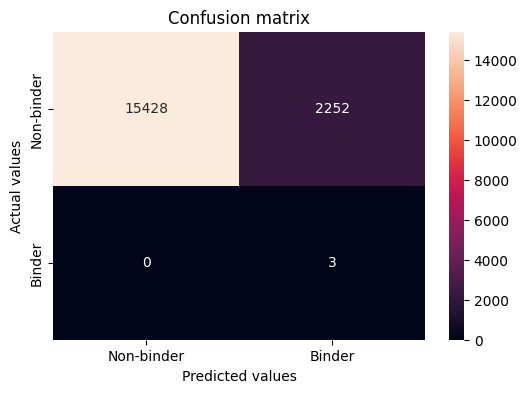

AUC :  1.0
Accuracy score  :  0.873
Sensitivity (TPR):  1.0
Specificity (TNR):  0.873


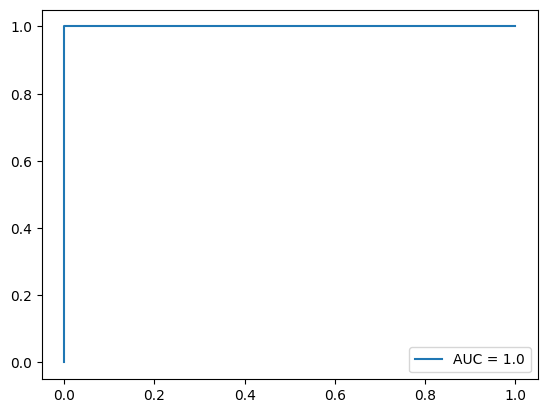

              precision    recall  f1-score   support

  Non-binder       1.00      0.81      0.90    137422
      Binder       0.49      0.98      0.65     24593

    accuracy                           0.84    162015
   macro avg       0.74      0.90      0.77    162015
weighted avg       0.92      0.84      0.86    162015



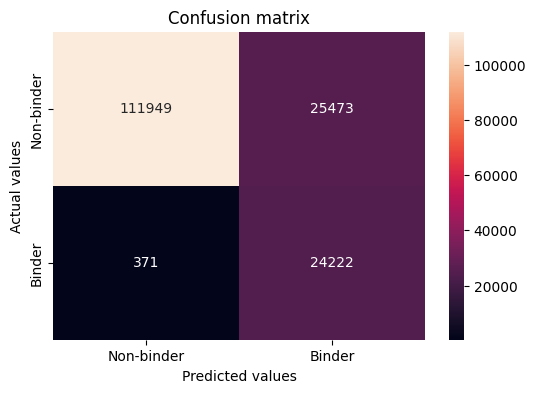

AUC :  0.877
Accuracy score  :  0.84
Sensitivity (TPR):  0.985
Specificity (TNR):  0.815


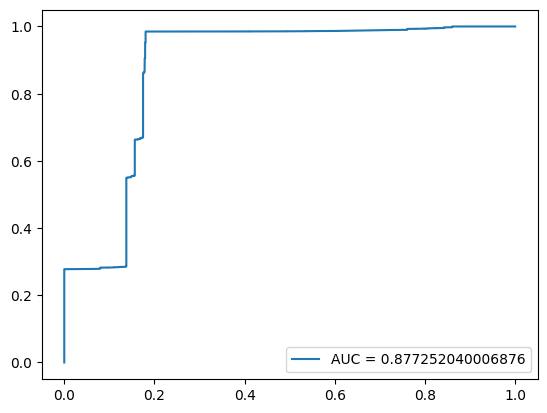

In [26]:
modeling_kd2(PRED_15_v2, lst_unseen_15)

              precision    recall  f1-score   support

  Non-binder       1.00      0.82      0.90    148002
      Binder       0.48      0.98      0.64     24593

    accuracy                           0.84    172595
   macro avg       0.74      0.90      0.77    172595
weighted avg       0.92      0.84      0.86    172595



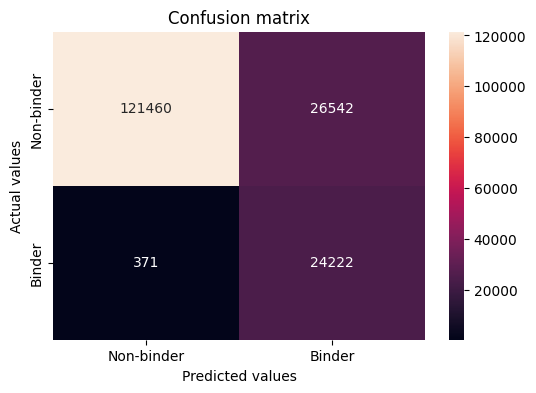

AUC :  0.88
Accuracy score  :  0.844
Sensitivity (TPR):  0.985
Specificity (TNR):  0.821


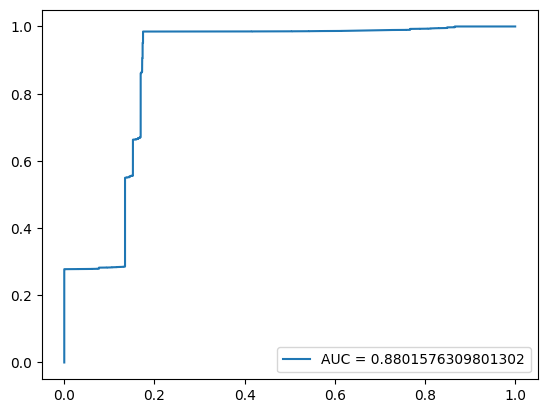

              precision    recall  f1-score   support

  Non-binder       1.00      0.90      0.95     11290
      Binder       0.00      0.00      0.00         0

    accuracy                           0.90     11290
   macro avg       0.50      0.45      0.47     11290
weighted avg       1.00      0.90      0.95     11290



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


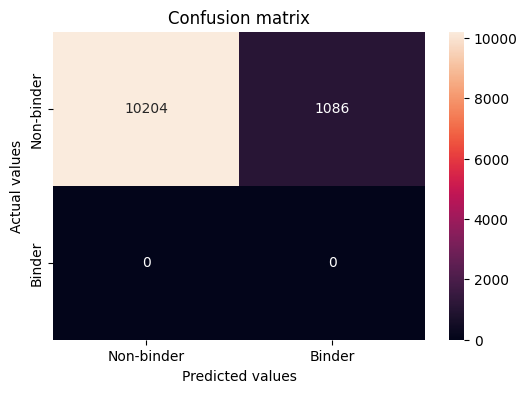

/tmp/ipykernel_96760/40690997.py:9: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = tp/(tp+fn)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [27]:
modeling_kd2(PRED_16_v2, lst_unseen_16)

              precision    recall  f1-score   support

  Non-binder       0.99      0.82      0.90    135870
      Binder       0.77      0.99      0.86     81726

    accuracy                           0.88    217596
   macro avg       0.88      0.90      0.88    217596
weighted avg       0.91      0.88      0.88    217596



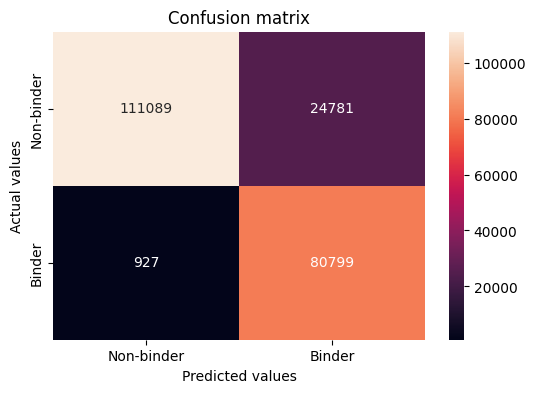

AUC :  0.956
Accuracy score  :  0.882
Sensitivity (TPR):  0.989
Specificity (TNR):  0.818


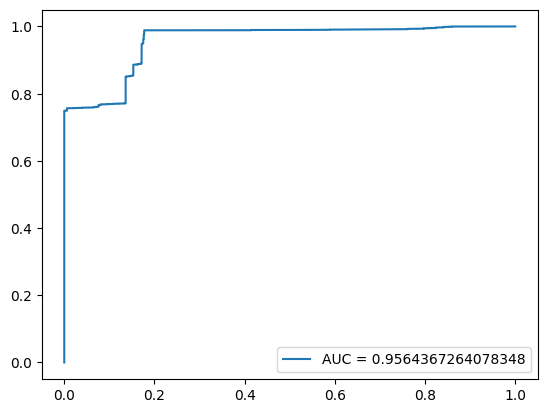

              precision    recall  f1-score   support

  Non-binder       0.00      0.00      0.00         0
      Binder       1.00      1.00      1.00     39362

    accuracy                           1.00     39362
   macro avg       0.50      0.50      0.50     39362
weighted avg       1.00      1.00      1.00     39362



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


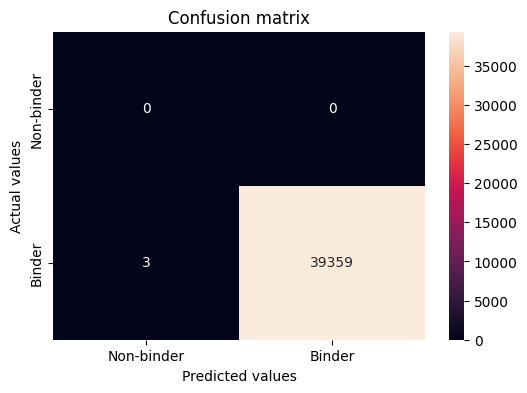

/tmp/ipykernel_96760/40690997.py:10: RuntimeWarning: invalid value encountered in long_scalars
  specificity = tn/(tn+fp)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [29]:
modeling_kd2(PRED_17_v2, lst_unseen_17)

              precision    recall  f1-score   support

  Non-binder       1.00      0.98      0.99   2120100
      Binder       0.00      0.95      0.00        40

    accuracy                           0.98   2120140
   macro avg       0.50      0.97      0.50   2120140
weighted avg       1.00      0.98      0.99   2120140



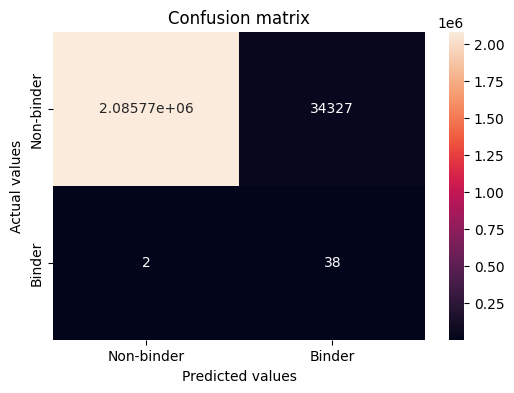

AUC :  0.97
Accuracy score  :  0.984
Sensitivity (TPR):  0.95
Specificity (TNR):  0.984


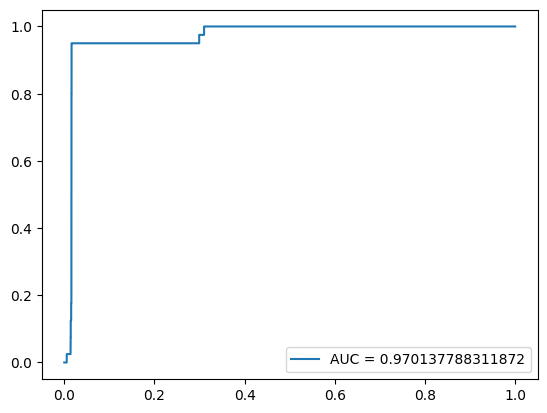

              precision    recall  f1-score   support

  Non-binder       1.00      0.66      0.79     18436
      Binder       0.00      0.00      0.00         0

    accuracy                           0.66     18436
   macro avg       0.50      0.33      0.40     18436
weighted avg       1.00      0.66      0.79     18436



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


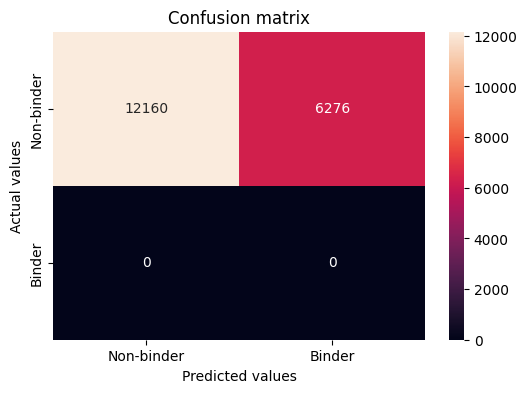

/tmp/ipykernel_96760/40690997.py:9: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = tp/(tp+fn)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [28]:
modeling_kd2(PRED_18_v2, lst_unseen_18)